In [3]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os
import mat73
import scipy
from xlwt import Workbook

# wb = Workbook()

# sheet1 = wb.add_sheet('Sheet 1')

directory = '/Volumes/Doraemon /BRDF 2021/recon_data_cubes'

files = Path(directory).glob('*')
DOLP_list = []
k = 1 
file_counter = 0
for file in files:
    file_counter += 1  
    
    if file_counter <= 619 :
        continue
file = "/Volumes/Doraemon /BRDF 2021/recon_data_cubes/20210528_134.mat"
data = mat73.loadmat(file)
lambda_val = data['lambda']
s0 = data['S0int']
s1 = data['S1int']
s2 = data['S2int']

s0 , s1, s2 = s0[700:900,500:800,55],s1[700:900,500:800,55],s2[700:900,500:800,55]

LL=np.zeros([100,100])
DOLP = np.zeros([100,100])
for i in range(100):
    for j in range(100):
        if ~np.isnan(s1[i][j].all()) and ~np.isnan(s2[i][j].all()) and ~np.isnan(s0[i][j].all()) and s0[i][j]**2 >= s1[i][j]**2 + s2[i][j]**2:
            LL[i][j] =np.sqrt(s1[i][j]**2+s2[i][j]**2)
            DOLP[i][j] = LL[i][j]/s0[i][j]

DOLP = DOLP[~np.isnan(DOLP)]

AOP = 0.5 * np.arctan2(s0, s1)
circular_threshold = 0.99
mean_DOLP = np.mean(DOLP)
mean_AOP = np.mean(AOP)
DOLP_list.append(mean_DOLP)

# Get file name
string = str(file)
index = string.rfind("/")
file_name = string[index+1:]

print(f'DoLP for {file_name} below image is {mean_DOLP}')
# sheet1.write(k, 0, file_name)
# sheet1.write(k, 1, mean_DOLP)
# k+=1
# wb.save('/Users/prachi/Documents/Semester2/NNDL/Project_F/NNDL_Project_F/DolP_data_new_latest2.xls')

DoLP for 20210528_1634.mat below image is 0.1154315032842951


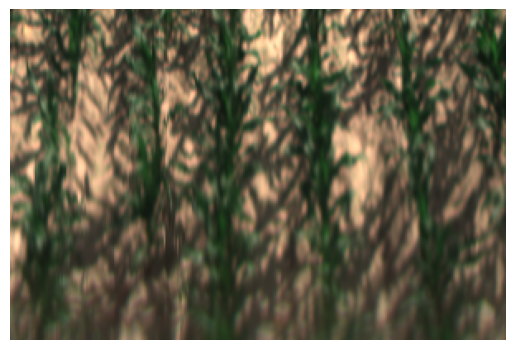

In [9]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os
import mat73
import scipy
from xlwt import Workbook
import cv2
image = cv2.imread("/Volumes/Doraemon /BRDF 2021/recon_data_cubes/rgbimgs/20210608_1634.png")

y=500
x=700
h=800
w=900
crop_image = image[x:w, y:h]

crop_image = cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB)

# Display the cropped image
plt.imshow(crop_image)
plt.axis('off')  # Turn off axis
plt.show()
cv2.imshow("Cropped", crop_image)
# cv2.waitKey(0)

